<h1> Machine learning Assignment 1: Regression Practical Problem <h1>

<h2> 
By Famba Abdulnassiir Siraji <br>
Reg No: Jan22/Comp/1195u Course Unit: J22.CS 507 Machine Learning
</h2>

<P>
Use the dataset Internet Traffic  provided to:

1)      Visualize the Historical Data.

2)      Apply Simple Linear Regression: First Order Polynomial.

3)      Apply Linear Regression: Higher Order Polynomials.

4)      Calculate the Errors.

5)      Non-Linear Regression Model: Exponential Growth.

6)      Comparing Models.

</P>

<h2> Import libraries to use <h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
!pip install scikit-learn

In [3]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

<h2> Visualize the Historical Data </h2>

In [4]:
filename = './Data/internet_traffic_hist.csv'
df_traffic = pd.read_csv(filename)

# View the first five rows of our data frame to comfirm it reads
df_traffic.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


In [5]:
# View the last Fivre rows of our data frame
df_traffic.tail()

,traffic,year
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014
10,931.200929,2015


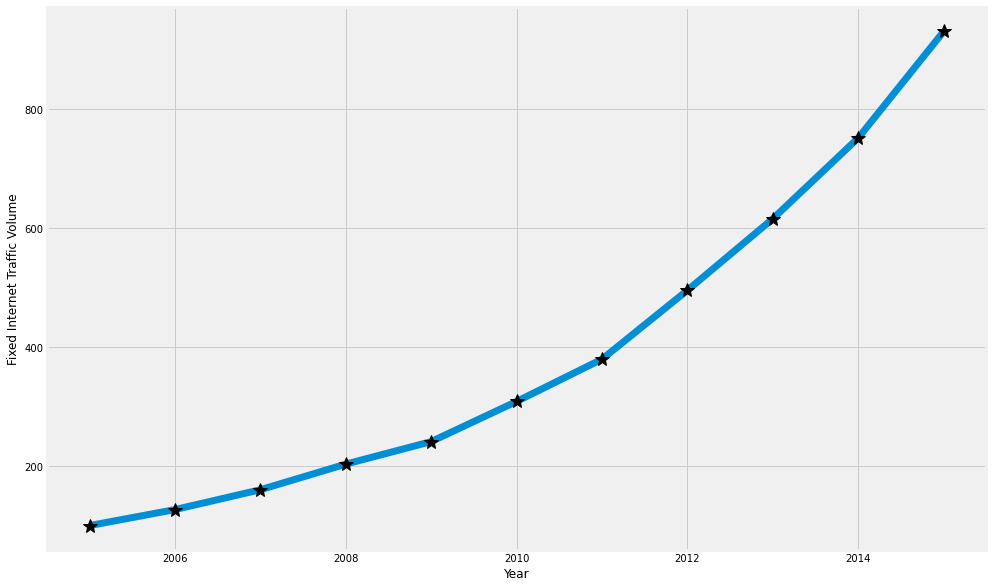

In [6]:
#size of space to be occupied by our graph
plt.figure(figsize = (15,10))

# XY Plot of year and traffic
x = df_traffic.year
y = df_traffic.traffic

# XY Plot of year and traffic
plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

<h2> Apply Simple Linear Regression: First Order Polynomial </h2>

The slope of line is 79.52710966244513.
The y intercept is -159457.12265833947.
The best fit simple linear regression line is 79.52710966244513x + -159457.12265833947.


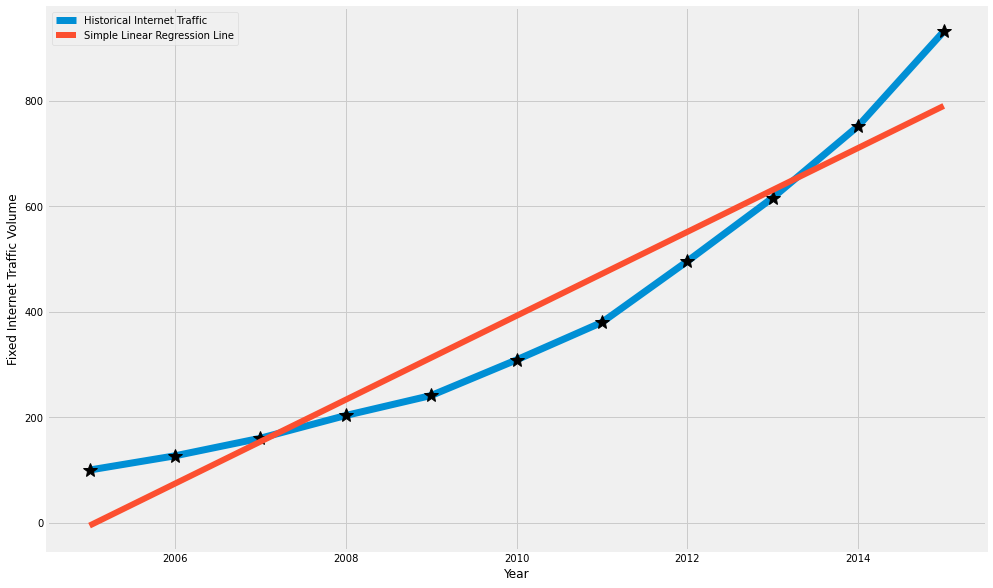

In [7]:

plt.figure(figsize = (15,10))

order = 1


# XY Plot of year and traffic
x = df_traffic.year
y = df_traffic.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print (f'The slope of line is {m}.')
print (f'The y intercept is {b}.')
print (f'The best fit simple linear regression line is {m}x + {b}.')


# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


plt.show()

<h2>Apply Linear Regression: Higher Order Polynomials</h2>

Text(0, 0.5, 'Fixed Internet Traffic Volume')

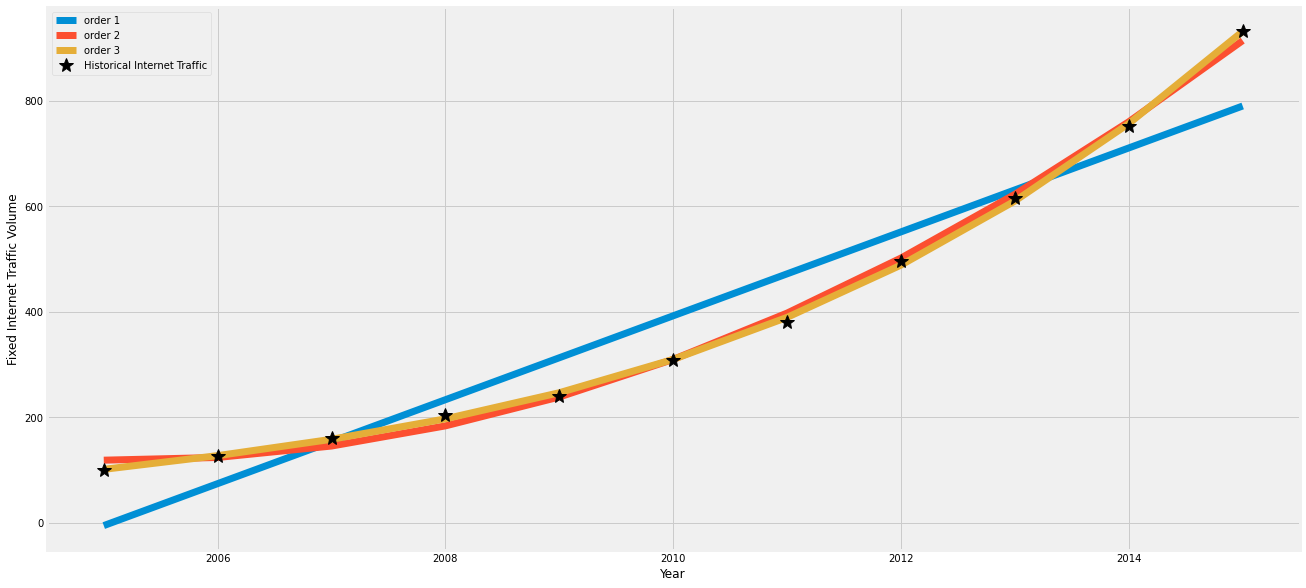

In [8]:

models = []       
errors_hist = [] 
mse_hist = []    

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')


<h2>Calculate the Errors.</h2>

In [13]:
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    #Absolute error
    e = np.abs(y-p(x))
    
    #MSE
    mse = np.sum(e**2)/len(df_traffic)
    
     #Store the absolute errors
    errors_hist.append(e) 
    
    #Store the mse
    mse_hist.append(mse) 
    
print(f'The Absolute errors for each year are: {e}')
print(f'The MSE is :{mse}')

The Absolute errors for each year are: [1.30742511 0.39124818 2.02723118 6.32983536 5.28394036 0.93069435
 9.41691912 7.3401041  6.2773003  4.48133469 0.16290912]
The MSE is :25.17218438789268


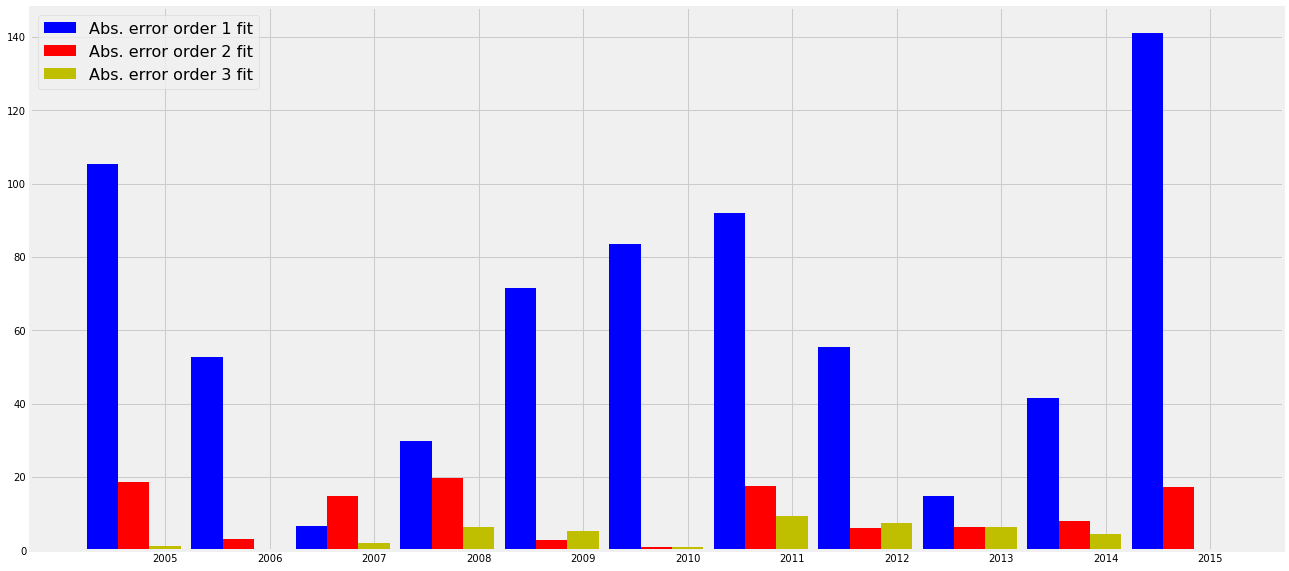

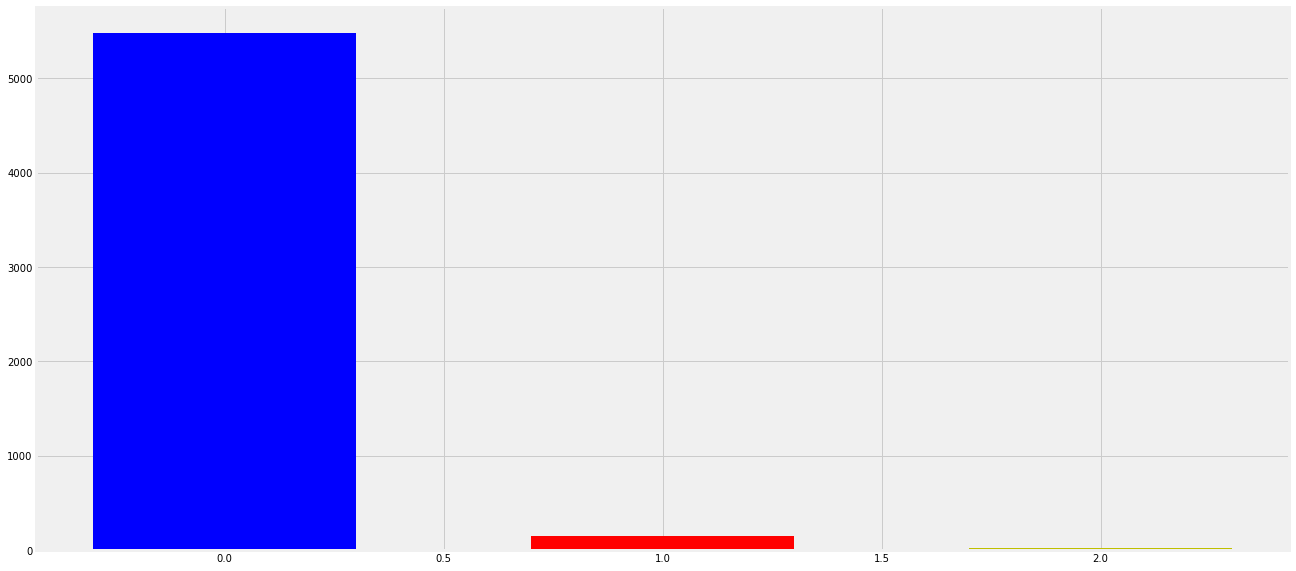

In [10]:
#Visualise the fit error for each year

x = df_traffic.year
width = 0.3

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')


plt.show()

<h2>Non-Linear Regression Model: Exponential Growth</h2>

In [11]:
def exponential_func(x, a, b):
    return a * (b ** x) 

# the regressor is not the year in itself, but the number of years from 2005
x = np.arange(2016-2005)    
y = df_traffic.traffic.values

# use curve_fit to find the exponential parameters vector p. cov expresses the confidence of the 
# algorithm on the estimated parameters 
p, cov = curve_fit(exponential_func, x, y)
e = np.abs(y - exponential_func(x, *p))
mse = np.sum(e**2)/len(df_traffic)

print(f'The estimated exponential parameters are: {p}')
print(f'The errors for each value of x, given the estimated exponential parameters are: \n {e}')
print(f'The MSE is :{mse}')

models.append(p)

# Store the error 
errors_hist.append(e) 
mse_hist.append(mse)

The estimated exponential parameters are: [103.37820148   1.24678465]
The errors for each value of x, given the estimated exponential parameters are: 
 [ 3.37820148  1.95659906  0.39475809  3.03416216  8.50876833  2.65664482
  8.32850909 11.70265945 12.59154092  0.47531784  7.10276492]
The MSE is :47.23616366678741


<h2>Comparing Models</h2>

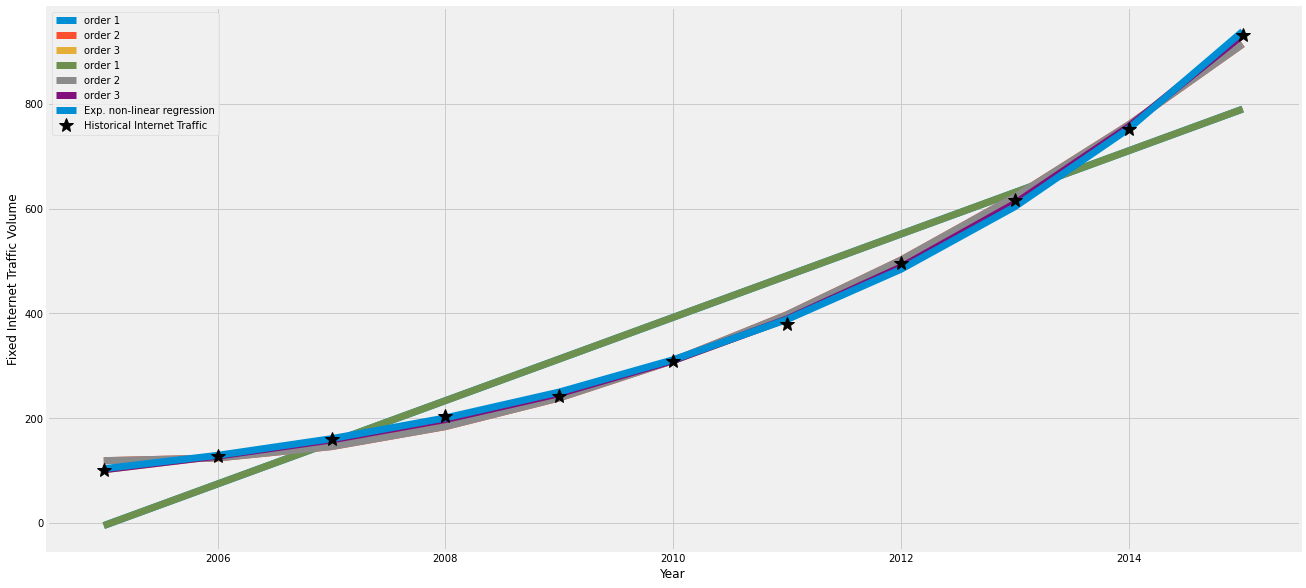

In [12]:

plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:-1]:
    
    x = df_traffic.year.values      
    y = df_traffic.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

# Visualize exponenetial model fit
x = np.arange(2016-2005)
plt.plot(df_traffic.year.values, exponential_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(df_traffic.year, df_traffic.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()

<p>
The difference between a 2nd or 3rd order polynomial regression model and the exponential one is negligible, For the years selected.</p>